In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

/home/tushar/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data = pd.read_csv('/home/tushar/projects/all/train.csv')
main_data =  data.copy()
ID = data.pop('id')

In [6]:
data.shape
data.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [7]:
#labels are textual so for encoding them categorically
y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)


(990,)


In [8]:
#standardising the mean as the learning algorithms are prone to feature scaling
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit(data).transform(data)
X = StandardScaler().fit(data).transform(data)

In [9]:
print(X.shape)
X

(990, 192)


array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [14]:
from keras.models import Sequential
from keras.layers import merge
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import utils as np_utils

In [15]:
#As we have to compute on categorical crossentropy function we have to convert the labels into one-hot representation
y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [16]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2,random_state=12345)
train_index, val_index = next(iter(sss.split(X, y)))
x_train, x_val = X[train_index], X[val_index]
y_train, y_val = y_cat[train_index], y_cat[val_index]
print("x_train dim: ",x_train.shape)
print("x_val dim:   ",x_val.shape)

x_train dim:  (792, 192)
x_val dim:    (198, 192)


In [17]:
##Layer model for Neural network
## use of softmax layer to predict probablilistic disribution
model = Sequential()
model.add(Dense(768,input_dim=192,  kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(768, activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(99, activation='softmax'))

In [30]:
## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

In [31]:
## Fitting the model on the whole training data with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=300)

history = model.fit(x_train, y_train,batch_size=192,epochs=2500 ,verbose=0,
                    validation_data=(x_val, y_val),callbacks=[early_stopping])

In [32]:
print('val_acc: ',max(history.history['val_acc']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['acc']))
print('train_loss: ',min(history.history['loss']))

val_acc:  0.989898970632842
val_loss:  0.02903422447200159
train_acc:  1.0
train_loss:  1.2041342264031604e-07


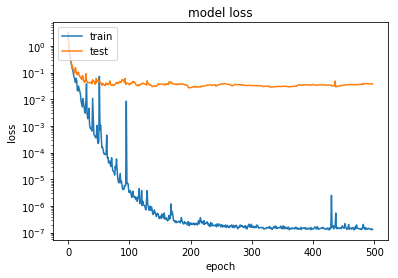

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
##plotting the loss with number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
test = pd.read_csv('/test.csv')
index = test.pop('id')

##doing same transformation for test
test = preprocessing.MinMaxScaler().fit(test).transform(test)
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)